In [440]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline
sns.set()

In [441]:
# Reading the  data set

df = pd.read_excel('data/Data_train.xlsx')

In [442]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [444]:
df.shape

(10683, 11)

In [445]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [446]:
# Dropping nan values

df.dropna(inplace = True)

In [447]:
df.shape

(10682, 11)

In [448]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")

In [449]:
# splitting 'Date_of_Journey' Column into 'Journey_month' & 'Journey_day' Column  
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [450]:
# splitting Dep_Time column into Dep_hours and Dep_min
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1]

In [451]:
# changing Date type object to int

df['Dep_hour'] = df['Dep_hour'].astype('int')
df['Dep_min'] = df['Dep_min'].astype('int')

In [452]:
df["Arrival_Time"]=df["Arrival_Time"].str.split(" ").str[0]

In [453]:
# splitting  Arrival_Time column into Arrival_hour and Arrival_min 
df["Arrival_hour"]=df["Arrival_Time"].str.split(":").str[0]
df["Arrival_min"] = df["Arrival_Time"].str.split(':').str[1]

In [454]:
# changing date type object to int

df["Arrival_hour"] = df["Arrival_hour"].astype('int')
df["Arrival_min"] = df["Arrival_min"].astype('int')

In [455]:
# splitting  Duration  columns into Duration_hour and Duration_min 
df['Duration_hours'] = df['Duration'].str.split().str[0]
df['Duration_mins'] = df['Duration'].str.split().str[1]

In [456]:
# dropping  columns 

df.drop(['Date_of_Journey' , 'Route' , 'Dep_Time' ,'Arrival_Time' , 'Duration' , 'Additional_Info' ] , axis = 1 , inplace = True)

In [457]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19h,NaN
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4h,45m


In [458]:
df.shape

(10682, 13)

In [459]:
# remove 'm' in data
df['Duration_mins']=df['Duration_mins'].str.replace('m' , " ") 

In [460]:
df['Duration_mins']=df['Duration_mins'].replace('nan' , np.nan)

In [461]:
# some nan value in Duration_min columns so replace nan value with 0

df['Duration_mins'] = df['Duration_mins'].fillna(0)

In [462]:
# remove 'h' in data
df['Duration_hours']=df['Duration_hours'].str.replace('h' , ' ')

In [463]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int32 
 6   Journey_month   10682 non-null  int32 
 7   Dep_hour        10682 non-null  int32 
 8   Dep_min         10682 non-null  int32 
 9   Arrival_hour    10682 non-null  int32 
 10  Arrival_min     10682 non-null  int32 
 11  Duration_hours  10682 non-null  object
 12  Duration_mins   10682 non-null  object
dtypes: int32(6), int64(1), object(6)
memory usage: 918.0+ KB


In [465]:
### its saying that Duration_hour and Duration_min are objects

df["Duration_hours"].value_counts()

Duration_hours
2      2402
1       621
3       501
7       487
5       481
9       445
12      428
8       424
13      407
11      365
10      355
6       340
14      337
15      268
23      264
26      241
16      234
4       222
22      218
24      197
21      196
25      186
27      179
20      162
18      141
19      134
17      129
28       94
29       65
30       49
38       34
37       17
33       13
32        9
34        8
35        7
36        7
31        6
47        2
42        2
39        2
5m        1
41        1
40        1
Name: count, dtype: int64

In [466]:
# Change data type object to int
# df['Duration_hour'] = df['Duration_hour'].astype('int')
# ValueError: invalid literal for int() with base 10: '5m'


In [467]:
df = df[~(df['Duration_hours'] == '5m')]



In [468]:
df.shape

(10681, 13)

In [469]:
# Change data type object to int
df['Duration_hours'] = df['Duration_hours'].astype('int')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10681 non-null  object
 1   Source          10681 non-null  object
 2   Destination     10681 non-null  object
 3   Total_Stops     10681 non-null  object
 4   Price           10681 non-null  int64 
 5   Journey_day     10681 non-null  int32 
 6   Journey_month   10681 non-null  int32 
 7   Dep_hour        10681 non-null  int32 
 8   Dep_min         10681 non-null  int32 
 9   Arrival_hour    10681 non-null  int32 
 10  Arrival_min     10681 non-null  int32 
 11  Duration_hours  10681 non-null  int32 
 12  Duration_mins   10681 non-null  object
dtypes: int32(7), int64(1), object(5)
memory usage: 876.2+ KB


In [471]:
# change Data type oject to int

df['Duration_mins'] = df['Duration_mins'].astype('int')

In [472]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [473]:
df.isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10681 non-null  object
 1   Source          10681 non-null  object
 2   Destination     10681 non-null  object
 3   Total_Stops     10681 non-null  object
 4   Price           10681 non-null  int64 
 5   Journey_day     10681 non-null  int32 
 6   Journey_month   10681 non-null  int32 
 7   Dep_hour        10681 non-null  int32 
 8   Dep_min         10681 non-null  int32 
 9   Arrival_hour    10681 non-null  int32 
 10  Arrival_min     10681 non-null  int32 
 11  Duration_hours  10681 non-null  int32 
 12  Duration_mins   10681 non-null  int32 
dtypes: int32(8), int64(1), object(4)
memory usage: 834.5+ KB


In [475]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [476]:
df.shape

(10681, 13)

In [477]:
sns.set()

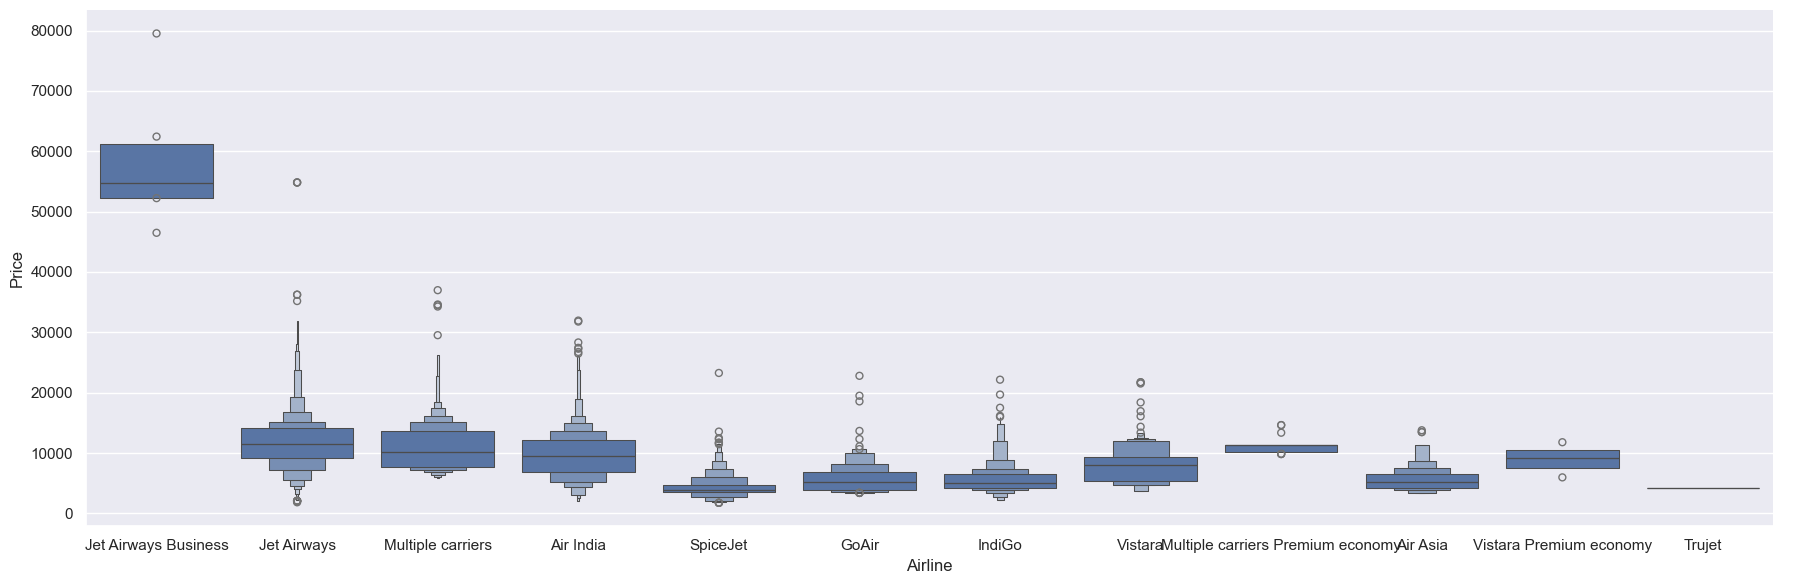

In [478]:
# From graph we can see that Jet Airways Business have the highest Price.

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data =df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


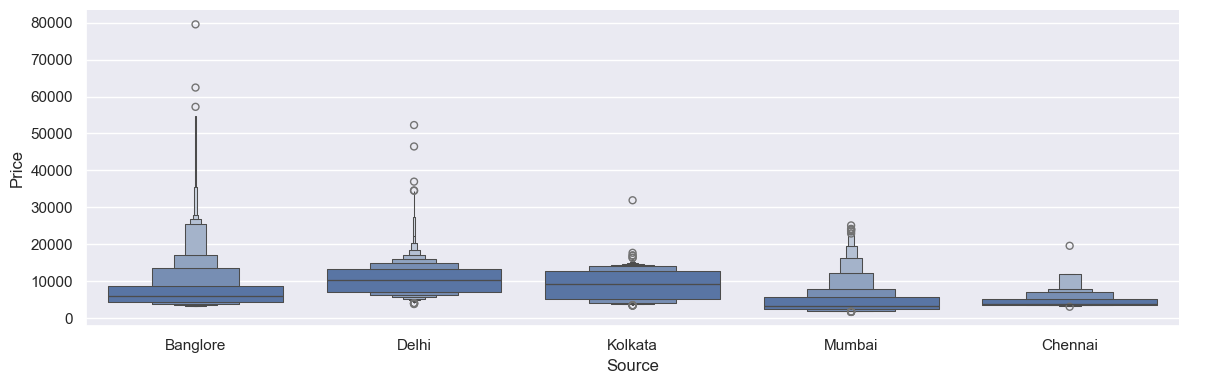

In [479]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

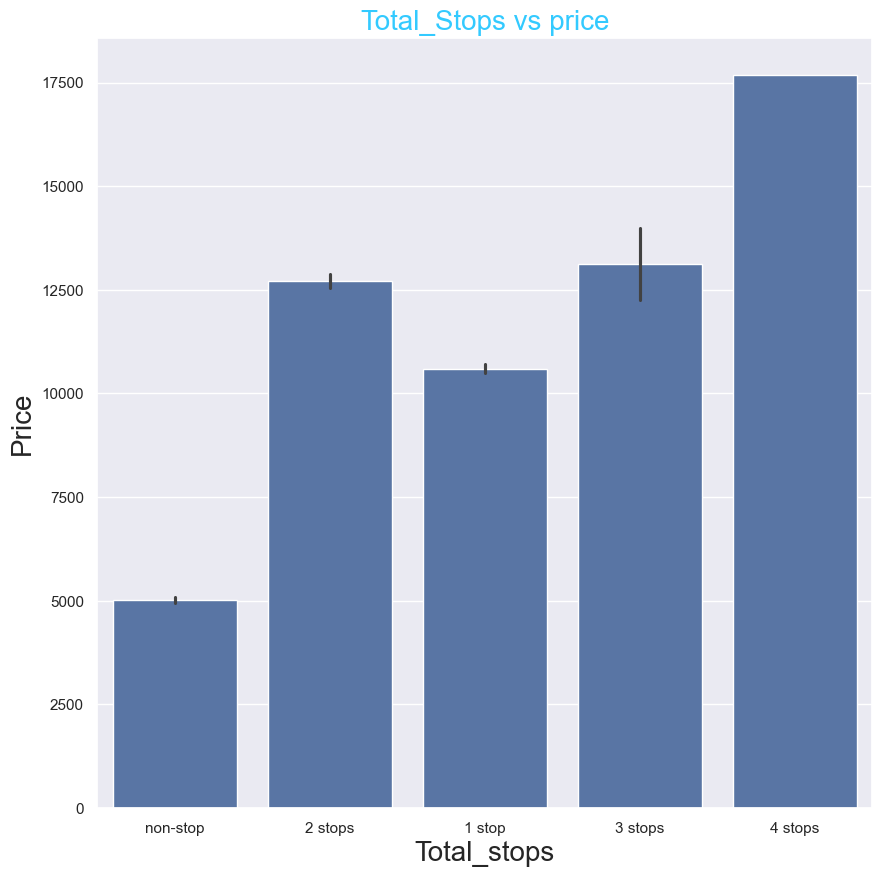

In [480]:
# Total_stop vs price distribution
plt.figure(figsize = (10,10))
plt.title('Total_Stops vs price' , fontsize = 20 , color = '#33caff')
sns.barplot(x = df['Total_Stops'] , y = df['Price'])
plt.xlabel('Total_stops' , fontsize = 20)
plt.ylabel('Price' , fontsize = 20)
plt.show()

<Axes: ylabel='count'>

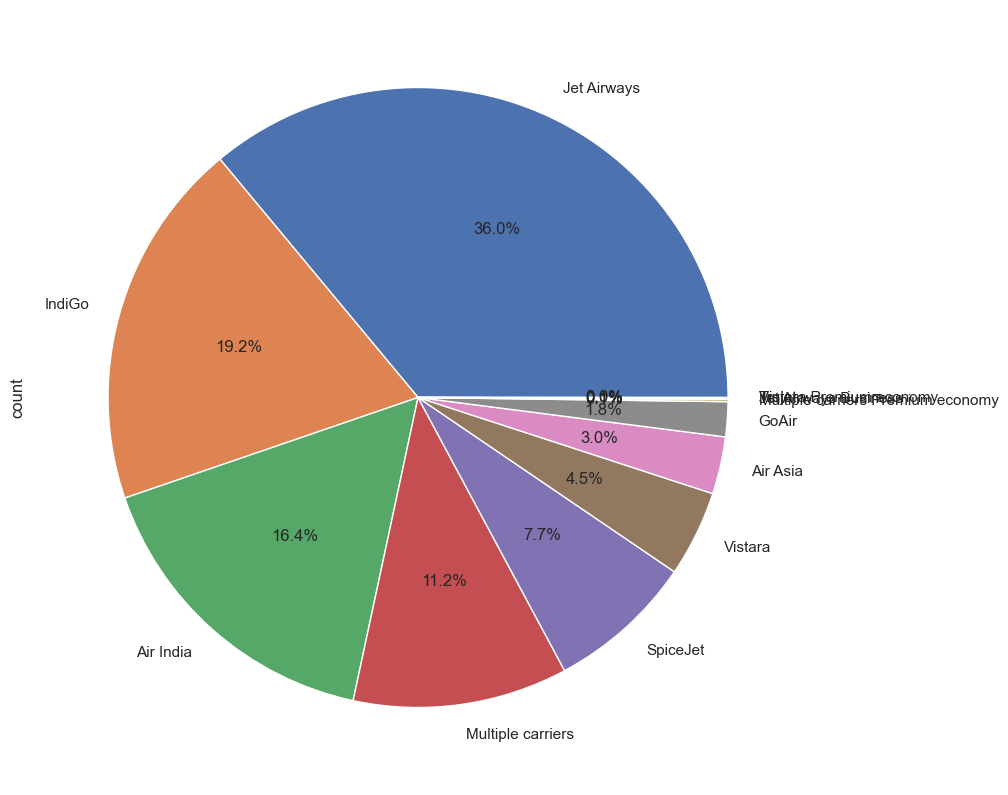

In [481]:
# Airline pie plot

df['Airline'].value_counts().plot.pie(y = df['Airline'] , figsize = (10,13) , autopct = '%2.1f%%')

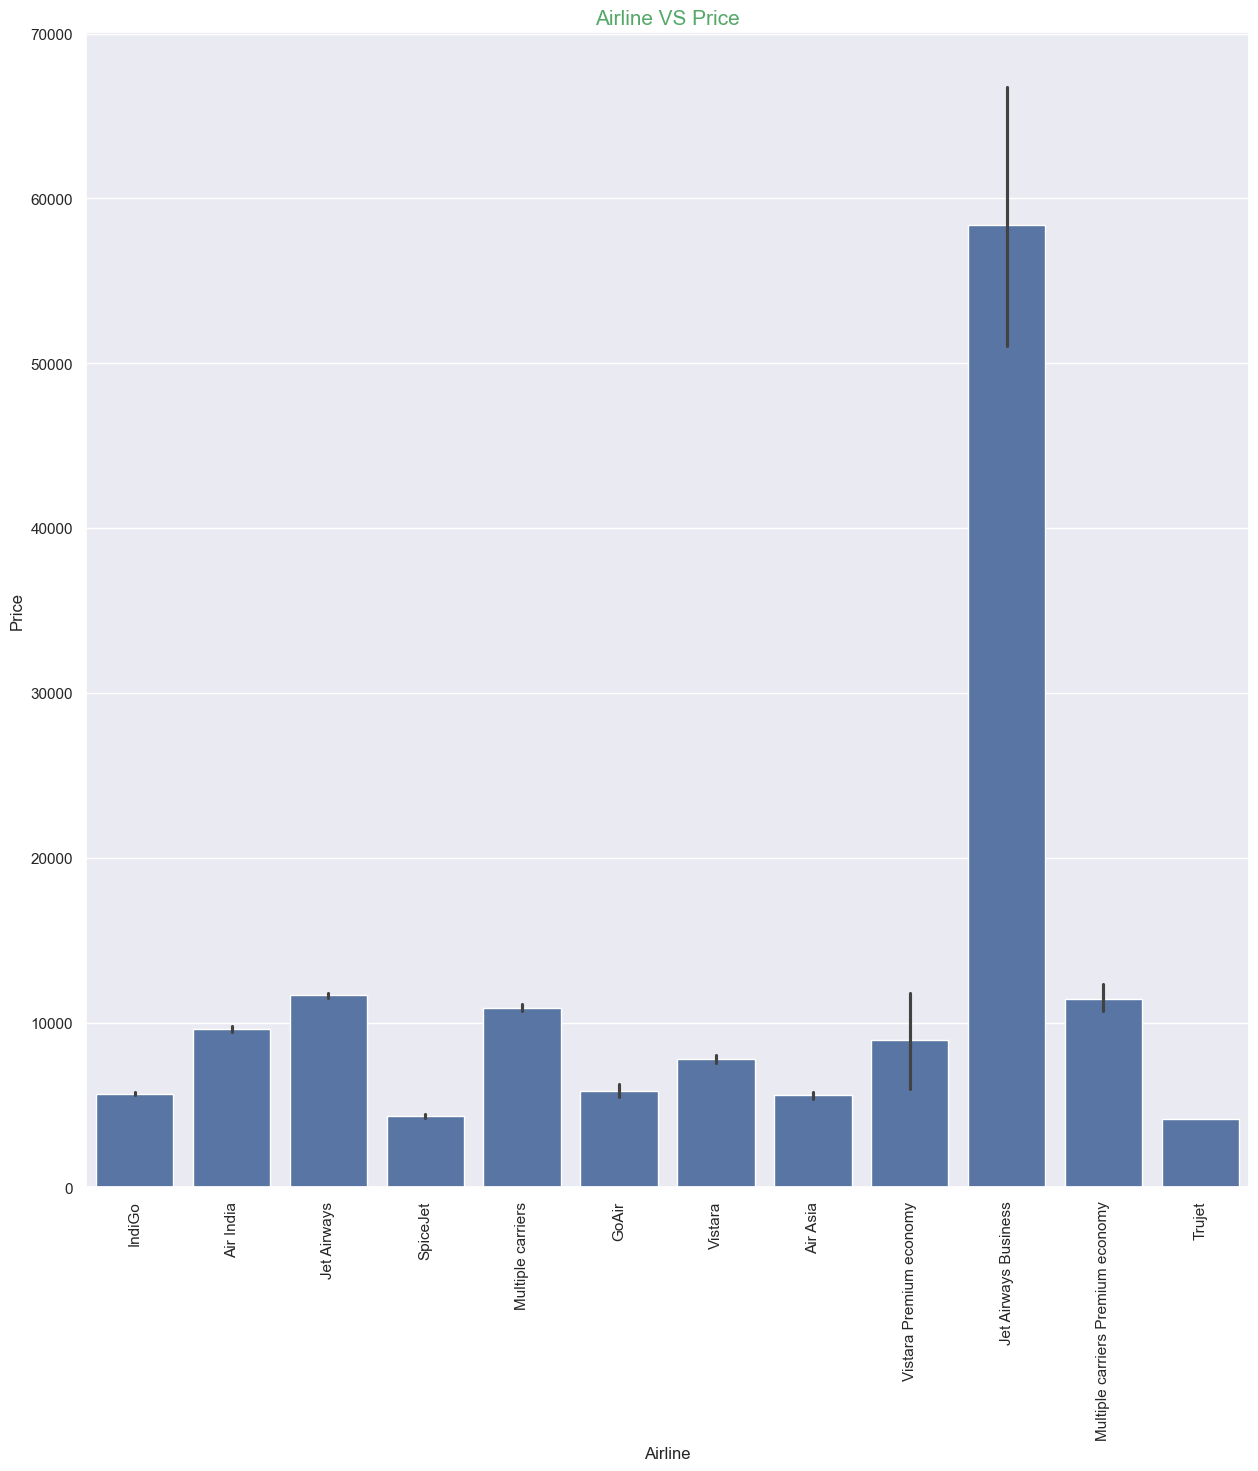

In [482]:
# Price compare to airline
plt.figure(figsize = (15,15))
plt.title('Airline VS Price' , size = 15 , color = 'g')
sns.barplot(x = df['Airline'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

In [483]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [484]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [485]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [486]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [487]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [488]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df, Airline, Source, Destination], axis = 1)

In [489]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [490]:
data_train.shape

(10681, 33)

In [491]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [492]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [493]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [494]:
data_train.shape

(10681, 30)

## Test set

In [496]:
test_data = pd.read_csv(r"data\Test_set.csv")


In [497]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [498]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [499]:
# Dropping nan values
test_data.dropna(inplace=True)

test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y")

# splitting 'Date_of_Journey' Column into 'Journey_month' & 'Journey_day' Column  
test_data['Journey_day'] = test_data['Date_of_Journey'].dt.day
test_data['Journey_month'] = test_data['Date_of_Journey'].dt.month

# splitting Dep_Time column into Dep_hours and Dep_min
test_data['Dep_hour'] = test_data['Dep_Time'].str.split(':').str[0]
test_data['Dep_min'] = test_data['Dep_Time'].str.split(':').str[1]

# changing Date type object to int
test_data['Dep_hour'] = test_data['Dep_hour'].astype('int')
test_data['Dep_min'] = test_data['Dep_min'].astype('int')

test_data["Arrival_Time"] = test_data["Arrival_Time"].str.split(" ").str[0]

# splitting Arrival_Time column into Arrival_hour and Arrival_min 
test_data["Arrival_hour"] = test_data["Arrival_Time"].str.split(":").str[0]
test_data["Arrival_min"] = test_data["Arrival_Time"].str.split(':').str[1]

# changing date type object to int
test_data["Arrival_hour"] = test_data["Arrival_hour"].astype('int')
test_data["Arrival_min"] = test_data["Arrival_min"].astype('int')

# splitting Duration columns into Duration_hour and Duration_min 
test_data['Duration_hours'] = test_data['Duration'].str.split().str[0]
test_data['Duration_mins'] = test_data['Duration'].str.split().str[1]

# dropping columns 
test_data.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis=1, inplace=True)

test_data['Duration_mins'] = test_data['Duration_mins'].str.replace('m', " ") 
test_data['Duration_mins'] = test_data['Duration_mins'].replace('nan', np.nan)

# some nan value in Duration_min columns so replace nan value with 0
test_data['Duration_mins'] = test_data['Duration_mins'].fillna(0)

# remove 'h' in data
test_data['Duration_hours'] = test_data['Duration_hours'].str.replace('h', ' ')







In [500]:
test_data = test_data[~(test_data['Duration_hours'] == '5m')]


In [501]:

# Change data type object to int
test_data['Duration_hours'] = test_data['Duration_hours'].astype('int')

# change Data type object to int
test_data['Duration_mins'] = test_data['Duration_mins'].astype('int')



In [502]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)


# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            439
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       185
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     185
Kolkata        75
Name: count, dtype: 

In [503]:
test_data.head()


,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [504]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [505]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [506]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [507]:
print(selection.feature_importances_)

[2.14470110e-01 1.44960705e-01 5.20678304e-02 2.39425030e-02
 2.15567152e-02 2.88001201e-02 1.93937387e-02 1.43343820e-01
 1.74027925e-02 1.00527448e-02 2.00770393e-03 1.67382869e-02
 1.34678385e-01 6.67751789e-02 2.01897777e-02 8.51261918e-04
 3.18499325e-03 8.70440279e-05 5.12839236e-03 7.81761590e-05
 5.44967042e-04 6.12486631e-03 3.38716671e-03 7.13215660e-03
 9.88474716e-03 1.60068660e-02 5.81995412e-03 5.33229048e-04
 2.48557672e-02]


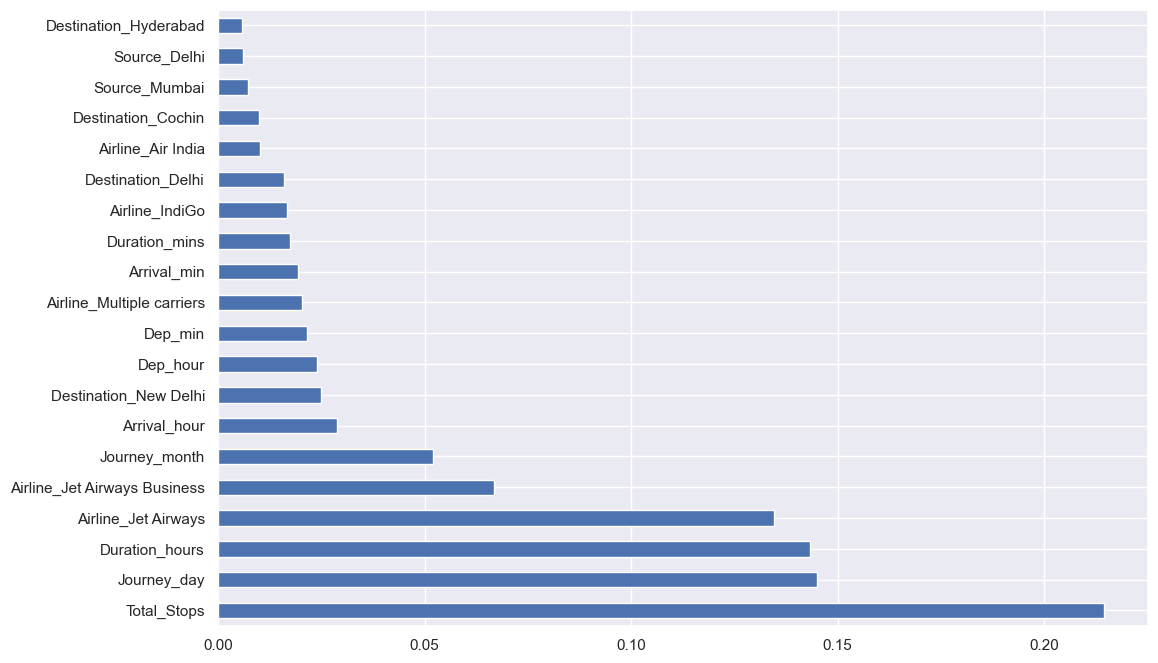

In [508]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [510]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [511]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [512]:
y_pred = reg_rf.predict(X_test)

In [513]:
reg_rf.score(X_train, y_train)

0.9541687769447621

In [514]:
reg_rf.score(X_test, y_test)

0.7963714834118945

In [515]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
metrics.r2_score(y_test, y_pred)

MAE: 1147.6010356210886
MSE: 4298956.573039212
RMSE: 2073.392527487068


0.7963714834118945

In [516]:
from sklearn.model_selection import RandomizedSearchCV

In [517]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [100,300, 500, 700, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [518]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [519]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [520]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [521]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [522]:
prediction = rf_random.predict(X_test)

In [523]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1486.3099170159642
MSE: 4554547.6850909535
RMSE: 2134.1386283676497


### Save the model to reuse it again


In [525]:
import pickle


In [526]:
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [527]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [528]:
y_prediction = forest.predict(X_test)


In [529]:
metrics.r2_score(y_test, y_prediction)


0.7963714834118945